# Exercice 3

# Importer les outils

In [0]:
# vecteurs et algèbre linéaire
import numpy as np

#les outils pour visualiser
import matplotlib.pyplot as plt

# le solveur
import scipy.integrate as solveur


# Définir les constantes du problème


In [0]:
Ca0 = 1.5 #mol/l
Cb0 = 2 #mol/l
Cc0 = 0 #mol/l
Cc0 = 0 #mol/l
Cd0 = 0 #mol/l
Ce0 = 0 #mol/l
Cf0 = 0 #mol/l
Vdot = 10 #L/min
k1 = 0.25 # mol/l*min
k2 = 0.1 # mol/l*min
k3 = 5 #mol/l*min


# Définir les équations à résoudre

In [0]:
def equations(variables, V, k1, k2, k3, Vdot):
  Fa, Fb, Fc, Fd, Fe, Ff = variables
  
  Ca = Fa/Vdot
  Cb = Fb/Vdot
  Cc = Fc/Vdot
  Cd = Fd/Vdot
  Ce = Fe/Vdot
  Cf = Ff/Vdot
  
  r1 = k1 * Ca * Cb
  r2 = k2 * Ca * Cd
  r3 = k3 * Cb**2 * Cc
  
  Ra = -r1 - 3*r2
  Rb = -2*r1 - r3
  Rc = r1 + r2 - 2*r3
  Rd = r1 - 2*r2 + r3
  Re = r2
  Rf = r3
  
  dFadV = Ra 
  dFbdV = Rb 
  dFcdV = Rc 
  dFddV = Rd
  dFedV = Re
  dFfdV = Rf
  
  return dFadV, dFbdV, dFcdV, dFddV, dFedV, dFfdV

# Définir les conditions initiales

In [0]:
conditions_initiales = [Ca0*Vdot, Cb0*Vdot, Cc0*Vdot, Cd0*Vdot, Ce0*Vdot, Cf0*Vdot]

# Résoudre le problème à l'aide su solveur

In [0]:
V = np.arange(0, 50, 0.1) # définir les bornes d'intégration
resultats = solveur.odeint(equations, conditions_initiales, V, (k1, k2, k3, Vdot))

# Visualiser les résultats

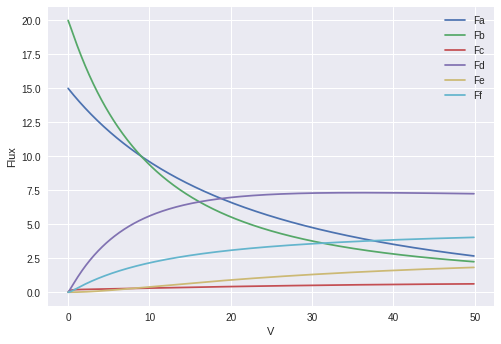

In [31]:
plt.plot(V, resultats)
plt.xlabel('V')
plt.ylabel('Flux')
plt.legend(['Fa', 'Fb', 'Fc', 'Fd', 'Fe', 'Ff'])
plt.show()

In [0]:
Fa = resultats[:,0]
Fb = resultats[:,1]
Fc = resultats[:,2]

In [0]:
Ca = Fa/Vdot

In [0]:
X = (Ca0 - Ca)/ Ca0

In [23]:
X[V>50][0]

0.8231904674970568

In [0]:
Cc = Fc / Vdot

In [29]:
Cc[V>50][0]

0.06145558816505538